In [76]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import config2
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pickle
import json

In [77]:
dir(config2)

['CSV_FILE_PATH',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'model_file_path',
 'os',
 'scale_model_path']

## problem statement

In [78]:
MBA Class student data to predict whether student will get place or not from dataset

SyntaxError: invalid syntax (1006668799.py, line 1)

## Reading data

In [79]:
csv_file = config2.CSV_FILE_PATH
data = pd.read_csv(csv_file)
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [81]:
df =data.drop(['sl_no','salary'],axis = 1)

In [82]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [83]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

## Analysis and processing data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [85]:
def distr_with_status(data1):
    distr = pd.crosstab(data1,df['status'])
    distr['percent of_placed'] = (distr['Placed']/(distr['Not Placed'] + distr['Placed']))*100
    return distr

## gender

<AxesSubplot: xlabel='gender', ylabel='count'>

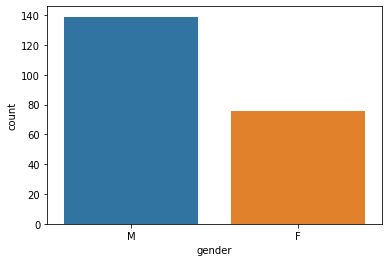

In [86]:
sns.countplot(x=df['gender'])


In [87]:
distr_with_status(df['gender'])

status,Not Placed,Placed,percent of_placed
gender,,,
F,28,48,63.157895
M,39,100,71.942446


In [88]:
From the table we can see that,
63% of Female students are placed
71% of Male students are place 


SyntaxError: invalid syntax (391185474.py, line 1)

In [89]:
df['gender'].value_counts().to_dict()

{'M': 139, 'F': 76}

In [90]:
 df['gender'].replace({'M': 1, 'F': 0},inplace = True)

In [91]:
# df.info()

## ssc_p

In [92]:
df['ssc_p'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Name: ssc_p, Length: 215, dtype: bool

<AxesSubplot: xlabel='ssc_p', ylabel='Density'>

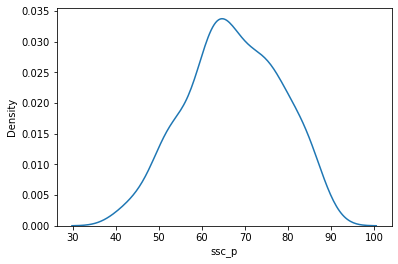

In [93]:
sns.kdeplot(df['ssc_p'])

<AxesSubplot: xlabel='ssc_p'>

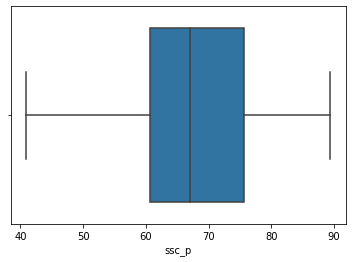

In [94]:
sns.boxplot(x=df['ssc_p'])

In [95]:
from boxplot it shows that there is no outliers in data

SyntaxError: invalid syntax (2257669093.py, line 1)

## ssc_b

<AxesSubplot: xlabel='ssc_b', ylabel='count'>

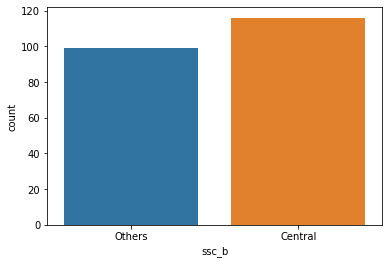

In [96]:
sns.countplot(x=df['ssc_b'])

In [97]:
distr_with_status(df['ssc_b'])

status,Not Placed,Placed,percent of_placed
ssc_b,,,
Central,38,78,67.241379
Others,29,70,70.707071


In [98]:
From above table we can see that,
From central board 67% students are placed
and From other board almost 71% student are placed

SyntaxError: invalid syntax (1610723460.py, line 1)

In [99]:
df['ssc_b'].value_counts().to_dict()

{'Central': 116, 'Others': 99}

In [100]:
df['ssc_b'].replace({'Central': 1, 'Others': 0} ,inplace= True)

In [101]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,1,58.00,0,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,1,67.00,0,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,0,74.00,0,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


## hsc_p

<AxesSubplot: xlabel='hsc_p', ylabel='Density'>

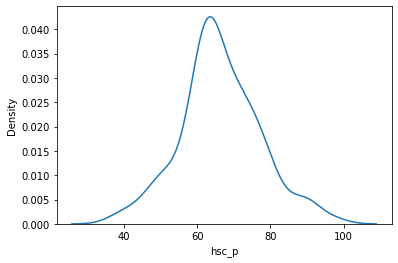

In [102]:
sns.kdeplot(df['hsc_p'])

In [103]:
In kdeplot it showing we have normally distrbuted data 

SyntaxError: invalid syntax (2211321803.py, line 1)

<AxesSubplot: xlabel='hsc_p'>

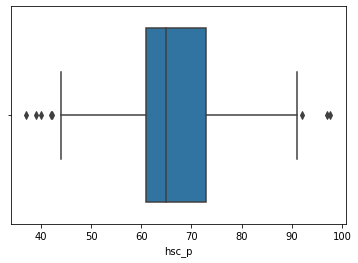

In [104]:
sns.boxplot(x=df['hsc_p'])

In [105]:
From boxplot it shows outliers in data 

SyntaxError: invalid syntax (2607813603.py, line 1)

In [106]:
we have normally distrbuted data, for that we will use zscore method to handle outliers

SyntaxError: invalid syntax (3501535805.py, line 1)

In [107]:
from scipy.stats import zscore

In [108]:
zscore_val= zscore(df['hsc_p'])
outliers_index = np.where(np.abs(zscore_val)>3)
df.iloc[outliers_index]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status


## hsc_b

<AxesSubplot: xlabel='hsc_b', ylabel='count'>

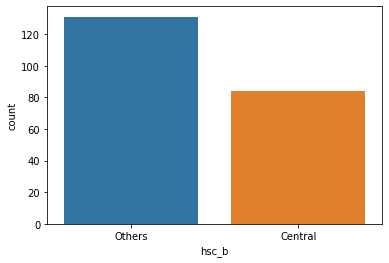

In [109]:
sns.countplot(x=df['hsc_b'])

In [110]:
df['hsc_b'].value_counts().to_dict()

{'Others': 131, 'Central': 84}

In [111]:
distr_with_status(df['hsc_b'])

status,Not Placed,Placed,percent of_placed
hsc_b,,,
Central,27,57,67.857143
Others,40,91,69.465649


In [112]:
From above table we can see that,
From central board 67% students are placed
and From other board 69% student are placed

SyntaxError: invalid syntax (424156892.py, line 1)

In [113]:
df['hsc_b'].replace({'Others': 0, 'Central': 1},inplace = True)

In [114]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,1,52.00,1,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,1,58.00,0,60.00,0,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,1,67.00,0,67.00,0,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,0,74.00,0,66.00,0,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


## hsc_s

<AxesSubplot: xlabel='hsc_s', ylabel='count'>

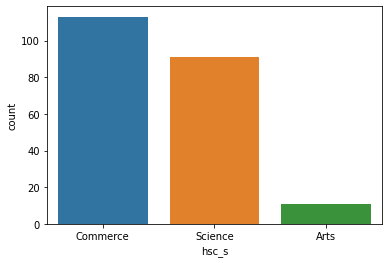

In [115]:
sns.countplot(x=df['hsc_s'])

In [116]:
distr_with_status(df['hsc_s'])

status,Not Placed,Placed,percent of_placed
hsc_s,,,
Arts,5,6,54.545455
Commerce,34,79,69.911504
Science,28,63,69.230769


In [117]:
df['hsc_s'].value_counts().to_dict()

{'Commerce': 113, 'Science': 91, 'Arts': 11}

In [118]:
df['hsc_s'].replace({'Commerce': 2, 'Science': 1, 'Arts': 0},inplace =True)

In [119]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,1,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,1,52.00,1,1,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,1,73.60,1,2,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,2,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,1,58.00,0,60.00,0,1,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,1,67.00,0,67.00,0,2,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,0,74.00,0,66.00,0,2,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


## degree_p

<AxesSubplot: xlabel='degree_p', ylabel='Density'>

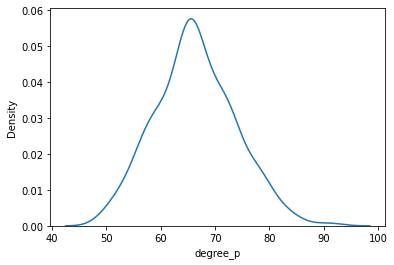

In [120]:
sns.kdeplot(df['degree_p'])

<AxesSubplot: xlabel='degree_p'>

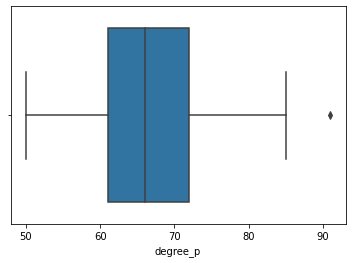

In [121]:
sns.boxplot(x=df['degree_p'])

In [122]:
zscore_val= zscore(df['degree_p'])
outliers_index = np.where(np.abs(zscore_val)>3)
df.iloc[outliers_index]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
197,0,83.96,0,53.0,0,1,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed


In [123]:
# zscore_val= zscore(df['degree_p'])
# df['degree_p'] = (np.where(np.abs(zscore_val)>3), df['degree_p'].median(), df['degree_p'])


## degree_t

<AxesSubplot: xlabel='degree_t', ylabel='count'>

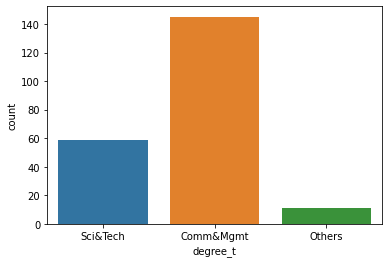

In [124]:
sns.countplot(x=df['degree_t'])

In [125]:
df['degree_t'].value_counts().to_dict()

{'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11}

In [126]:
distr_with_status(df['degree_t'])

status,Not Placed,Placed,percent of_placed
degree_t,,,
Comm&Mgmt,43,102,70.344828
Others,6,5,45.454545
Sci&Tech,18,41,69.491525


In [127]:
df['degree_t'].replace({'Comm&Mgmt': 3, 'Sci&Tech': 1, 'Others': 0},inplace= True)

In [128]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,1,77.48,1,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,1,68.00,1,0,64.00,3,No,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,1,52.00,1,1,52.00,1,No,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,1,73.60,1,2,73.30,3,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,2,77.60,3,No,91.0,Mkt&Fin,74.49,Placed
211,1,58.00,0,60.00,0,1,72.00,1,No,74.0,Mkt&Fin,53.62,Placed
212,1,67.00,0,67.00,0,2,73.00,3,Yes,59.0,Mkt&Fin,69.72,Placed
213,0,74.00,0,66.00,0,2,58.00,3,No,70.0,Mkt&HR,60.23,Placed


## workex

<AxesSubplot: xlabel='workex', ylabel='count'>

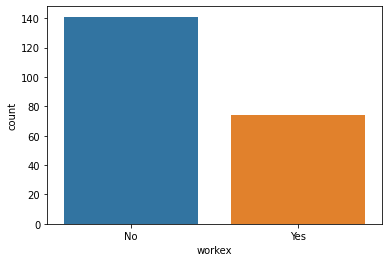

In [129]:
sns.countplot(x=df['workex'])

In [130]:
df['workex'].value_counts().to_dict()

{'No': 141, 'Yes': 74}

In [131]:
distr_with_status(df['workex'])

status,Not Placed,Placed,percent of_placed
workex,,,
No,57,84,59.574468
Yes,10,64,86.486486


In [132]:
df['workex'].replace({'No': 0, 'Yes': 1},inplace = True)

In [133]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,1,77.48,1,1,86.5,Mkt&Fin,66.28,Placed
2,1,65.00,1,68.00,1,0,64.00,3,0,75.0,Mkt&Fin,57.80,Placed
3,1,56.00,1,52.00,1,1,52.00,1,0,66.0,Mkt&HR,59.43,Not Placed
4,1,85.80,1,73.60,1,2,73.30,3,0,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,2,77.60,3,0,91.0,Mkt&Fin,74.49,Placed
211,1,58.00,0,60.00,0,1,72.00,1,0,74.0,Mkt&Fin,53.62,Placed
212,1,67.00,0,67.00,0,2,73.00,3,1,59.0,Mkt&Fin,69.72,Placed
213,0,74.00,0,66.00,0,2,58.00,3,0,70.0,Mkt&HR,60.23,Placed


## specialisation

<AxesSubplot: xlabel='specialisation', ylabel='count'>

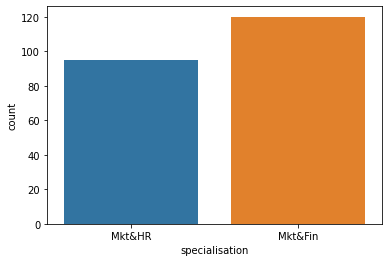

In [134]:
sns.countplot(x=df['specialisation'])

In [135]:
df['specialisation'].value_counts().to_dict()

{'Mkt&Fin': 120, 'Mkt&HR': 95}

In [136]:
distr_with_status(df['specialisation'])

status,Not Placed,Placed,percent of_placed
specialisation,,,
Mkt&Fin,25,95,79.166667
Mkt&HR,42,53,55.789474


In [137]:
df['specialisation'].replace({'Mkt&Fin': 1, 'Mkt&HR': 0},inplace = True)

In [138]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.0,0,58.80,Placed
1,1,79.33,1,78.33,0,1,77.48,1,1,86.5,1,66.28,Placed
2,1,65.00,1,68.00,1,0,64.00,3,0,75.0,1,57.80,Placed
3,1,56.00,1,52.00,1,1,52.00,1,0,66.0,0,59.43,Not Placed
4,1,85.80,1,73.60,1,2,73.30,3,0,96.8,1,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,2,77.60,3,0,91.0,1,74.49,Placed
211,1,58.00,0,60.00,0,1,72.00,1,0,74.0,1,53.62,Placed
212,1,67.00,0,67.00,0,2,73.00,3,1,59.0,1,69.72,Placed
213,0,74.00,0,66.00,0,2,58.00,3,0,70.0,0,60.23,Placed


## mba_p

<AxesSubplot: xlabel='mba_p', ylabel='Density'>

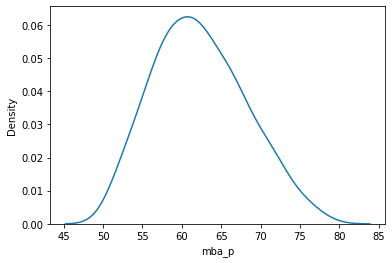

In [139]:
sns.kdeplot(df['mba_p'])

<AxesSubplot: xlabel='mba_p'>

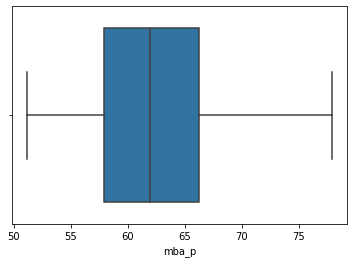

In [140]:
sns.boxplot(x=df['mba_p'])

## status

<AxesSubplot: xlabel='status', ylabel='count'>

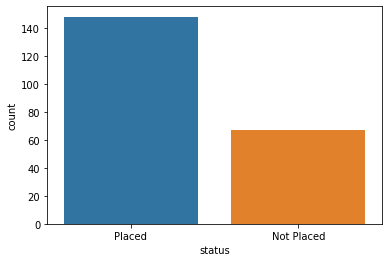

In [141]:
sns.countplot(x=df['status'])

In [142]:
df['status'].value_counts().to_dict()

{'Placed': 148, 'Not Placed': 67}

In [143]:
df['status'].replace({'Placed': 1, 'Not Placed': 0},inplace = True)

In [144]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.0,0,58.80,1
1,1,79.33,1,78.33,0,1,77.48,1,1,86.5,1,66.28,1
2,1,65.00,1,68.00,1,0,64.00,3,0,75.0,1,57.80,1
3,1,56.00,1,52.00,1,1,52.00,1,0,66.0,0,59.43,0
4,1,85.80,1,73.60,1,2,73.30,3,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,2,77.60,3,0,91.0,1,74.49,1
211,1,58.00,0,60.00,0,1,72.00,1,0,74.0,1,53.62,1
212,1,67.00,0,67.00,0,2,73.00,3,1,59.0,1,69.72,1
213,0,74.00,0,66.00,0,2,58.00,3,0,70.0,0,60.23,1


In [145]:
The data is imbalance,so we will balance it by using smote tech

SyntaxError: invalid syntax (3385260832.py, line 1)

## splitting data into training and testing dataset

In [146]:
x = df.drop('status',axis = 1)
y =df['status']


In [147]:
smote = SMOTE(sampling_strategy = 0.9,
        random_state=10,
        k_neighbors=5,)
x_samples , y_samples = smote.fit_resample(x,y)

In [148]:
y_samples.value_counts()

1    148
0    133
Name: status, dtype: int64

In [149]:
x_samples.shape

(281, 12)

In [150]:
y_samples.shape

(281,)

In [151]:
scalar = MinMaxScaler()
x_ScalarSamples= scalar.fit_transform(x_samples)

In [152]:
standard =StandardScaler()
x_StandarSamples = standard.fit_transform(x_samples)

In [153]:
#without scaling
# x_train,x_test,y_train,y_test = train_test_split(x_samples,y_samples , random_state=10,test_size=0.2, stratify=y_samples)

# with Normalization
    
x_train,x_test,y_train,y_test = train_test_split(x_ScalarSamples,y_samples , random_state=10,test_size=0.2, stratify=y_samples)

# with Standardization 

# x_train,x_test,y_train,y_test = train_test_split(x_StandarSamples,y_samples , random_state=10,test_size=0.2, stratify=y_samples)


In [154]:
x_train.shape

(224, 12)

In [155]:
x_test.shape

(57, 12)

In [156]:
y_train.value_counts()

1    118
0    106
Name: status, dtype: int64

## Model Training

In [157]:
class Evaluation():
    def __init__(self,model):
        self.model = model
    
    def Train_data(self,x_train,y_train):
        y_train_pred = self.model.predict(x_train)
        print(f'accuracy score of training dataset : {accuracy_score(y_train,y_train_pred)}\n')
        print(classification_report(y_train,y_train_pred))
        cm = confusion_matrix(y_train,y_train_pred)
        ConfusionMatrixDisplay(cm).plot()
        
    def Test_data(self, x_test,y_test):
        y_test_pred = self.model.predict(x_test)
        print(f'accuracy score o testing data: {accuracy_score(y_test,y_test_pred)}\n')
        print(classification_report(y_test,y_test_pred))
        cm = confusion_matrix(y_test,y_test_pred)
        ConfusionMatrixDisplay(cm).plot()

## Logistic regression

In [158]:
log_model =LogisticRegression()
log_model.fit(x_train,y_train)


LogisticRegression()

In [159]:
logistics_evaluation = Evaluation(log_model)

### Training data Evaluation on Logistic model

accuracy score of training dataset : 0.8883928571428571

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       106
           1       0.90      0.88      0.89       118

    accuracy                           0.89       224
   macro avg       0.89      0.89      0.89       224
weighted avg       0.89      0.89      0.89       224



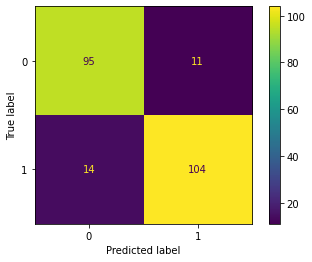

In [160]:
logistics_evaluation.Train_data(x_train,y_train)

### Testing data Evaluation on Logistic model

accuracy score o testing data: 0.8771929824561403

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.90      0.87      0.88        30

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



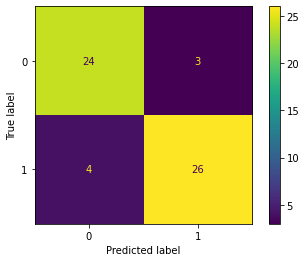

In [161]:
logistics_evaluation.Test_data(x_test,y_test)

## KNN

In [162]:

KNN_model =KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [163]:
knn_evaluation = Evaluation(KNN_model)

### Training data evaluation on KNN model

accuracy score of training dataset : 0.8348214285714286

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       106
           1       0.85      0.84      0.84       118

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



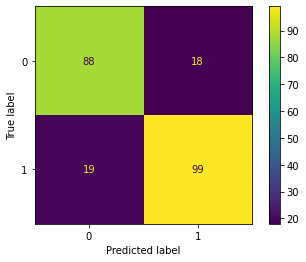

In [164]:
knn_evaluation.Train_data(x_train,y_train)

### Testing data evaluation on KNN model

accuracy score o testing data: 0.8245614035087719

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.83      0.83      0.83        30

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



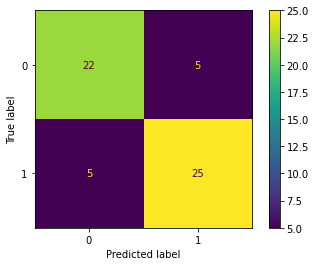

In [165]:
knn_evaluation.Test_data(x_test,y_test)

### Hyperparameter Tuning of KNN model

In [166]:
KNN_model = KNeighborsClassifier()

hyperparametrs= {
    'n_neighbors': np.arange(3,20),
    'p' : [1,2]
    }

gscv_knn_model = GridSearchCV(KNN_model,hyperparametrs,cv = 4)
gscv_knn_model.fit(x_train,y_train)
KNN_model=gscv_knn_model.best_estimator_
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19, p=1)

accuracy score of training dataset : 0.8348214285714286

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       106
           1       0.85      0.84      0.84       118

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



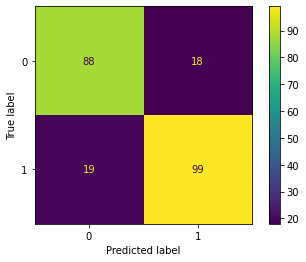

In [167]:
knn_evaluation.Train_data(x_train,y_train)

accuracy score o testing data: 0.8245614035087719

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.83      0.83      0.83        30

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



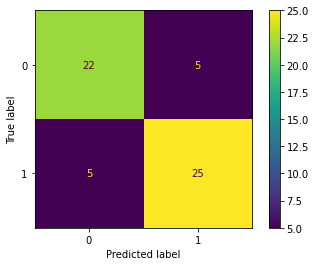

In [168]:
knn_evaluation.Test_data(x_test,y_test)

In [169]:
From above models,
>> By using MinMaxScalar we are getting better results.
>> we want high recall value for  Class 1 we dont want that student who are actually placed but model predicted not placed.
>> False Negative value should be mininmum ,that mean recall value must be high.
>> logistics model  gives 0.87 recall for Class 1 on test data
>> KNN model gives 0.83  recall for Class 1 on test data
>> so the logistics model is much better as compared to KNN

SyntaxError: invalid syntax (2986860584.py, line 1)

### Pickling model file for deployement

#### Save MinMax Scalar

In [170]:
scalar

MinMaxScaler()

In [171]:
with open('normal_scalar.pkl','wb') as f:
    pickle.dump(scalar,f)

### Test on User on Inputs

In [172]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [173]:
data.head(1).T

,0
sl_no,1
gender,M
ssc_p,67.0
ssc_b,Others
hsc_p,91.0
hsc_b,Others
hsc_s,Commerce
degree_p,58.0
degree_t,Sci&Tech
workex,No


In [174]:
x.shape[1]

12

In [175]:
json_data = {'gender':{'M': 1, 'F': 0},
             'ssc_b' :{'Central': 1, 'Others': 0},
             'hsc_b' :{'Others': 0, 'Central': 1},
             'hsc_s' :{'Commerce': 2, 'Science': 1, 'Arts': 0},
             'degree_t':{'Comm&Mgmt': 3, 'Sci&Tech': 1, 'Others': 0},
             'workex':{'No': 0, 'Yes': 1},
             'specialisation':{'Mkt&Fin': 1, 'Mkt&HR': 0},
             'columns':x.columns}
json_data

{'gender': {'M': 1, 'F': 0},
 'ssc_b': {'Central': 1, 'Others': 0},
 'hsc_b': {'Others': 0, 'Central': 1},
 'hsc_s': {'Commerce': 2, 'Science': 1, 'Arts': 0},
 'degree_t': {'Comm&Mgmt': 3, 'Sci&Tech': 1, 'Others': 0},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 1, 'Mkt&HR': 0},
 'columns': Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
        'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
       dtype='object')}

In [176]:
gender           = 'M'
ssc_p            = 67.0
ssc_b            = 'Others'
hsc_p            = 50.0
hsc_b            = 'Others'
hsc_s            = 'Commerce'
degree_p         = 58.0
degree_t         = 'Sci&Tech'
workex           = 'No'
etest_p          = 55.0
specialisation   = 'Mkt&HR'
mba_p            = 58.8

gender          = json_data['gender'][gender]
ssc_b           = json_data['ssc_b'][ssc_b]
hsc_b           = json_data['hsc_b'][hsc_b]
hsc_s           = json_data['hsc_s'][hsc_s]
degree_t        = json_data['degree_t'][degree_t]
workex          = json_data['workex'][workex]
specialisation  = json_data['specialisation'][specialisation]

col = log_model.n_features_in_
test_array = np.zeros(col)
test_array[0] =  gender  
test_array[1] =  ssc_p
test_array[2] =  ssc_b
test_array[3] =  hsc_p 
test_array[4] =  hsc_b
test_array[5] =  hsc_s
test_array[6] =  degree_p
test_array[7] =  degree_t
test_array[8] =  workex
test_array[9] =  etest_p
test_array[10] = specialisation
test_array[11] = mba_p

test_array = test_array.reshape(1,col)
scaled_test_array = scalar.transform(test_array)
predicted_class = log_model.predict(scaled_test_array)[0]
predicted_class


0

In [177]:
pickle.dump(log_model,open('logistics_model.pkl','wb'))

In [178]:
json_data = {'gender':{'M': 1, 'F': 0},
             'ssc_b' :{'Central': 1, 'Others': 0},
             'hsc_b' :{'Others': 0, 'Central': 1},
             'hsc_s' :{'Commerce': 2, 'Science': 1, 'Arts': 0},
             'degree_t':{'Comm&Mgmt': 3, 'Sci&Tech': 1, 'Others': 0},
             'workex':{'No': 0, 'Yes': 1},
             'specialisation':{'Mkt&Fin': 1, 'Mkt&HR': 0},
             'columns':x.columns.tolist()}
json_data

{'gender': {'M': 1, 'F': 0},
 'ssc_b': {'Central': 1, 'Others': 0},
 'hsc_b': {'Others': 0, 'Central': 1},
 'hsc_s': {'Commerce': 2, 'Science': 1, 'Arts': 0},
 'degree_t': {'Comm&Mgmt': 3, 'Sci&Tech': 1, 'Others': 0},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 1, 'Mkt&HR': 0},
 'columns': ['gender',
  'ssc_p',
  'ssc_b',
  'hsc_p',
  'hsc_b',
  'hsc_s',
  'degree_p',
  'degree_t',
  'workex',
  'etest_p',
  'specialisation',
  'mba_p']}

In [179]:
json.dump(json_data,open('project_json_data.json','w'))